In [8]:
import pandas as pd 
from pandas.plotting import table
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from datetime import date 
import math

# configurations
# this script is applicatble only for ring-molecules
NUM_CARBON = 6

# Read data from file 
date_computed = str(date.today())

In [9]:
# --------------- Graph showing correlation between initial structure vs. structure at twist -------------# 
# Read data from file 
date_computed = str(date.today())
file_path_1 = os.path.join(".", "output", "CHD",date_computed + "_IC_CHD_initial" + ".csv")
file_path_2 = os.path.join(".", "output", "CHD",date_computed + "_IC_CHD_hop" + ".csv")
initial_data = pd.read_csv(file_path_1)
hop_data = pd.read_csv(file_path_2)

# ----------------------- Merge & filter ----------------------- #
dih_merge = pd.merge(initial_data.iloc[:,:], \
                         hop_data.iloc[:,:], \
                         suffixes=('_initial','_hop'), on='TRAJ')
# dih_merge

In [6]:
dih_merge.columns

Index(['TRAJ', 'C1-C2_initial', 'C2-C3_initial', 'C3-C4_initial',
       'C4-C5_initial', 'C5-C6_initial', 'C6-C1_initial', 'C6-C1-C2_initial',
       'C1-C2-C3_initial', 'C2-C3-C4_initial', 'C3-C4-C5_initial',
       'C4-C5-C6_initial', 'C5-C6-C1_initial', 'dih H7-C1-C2-H8_initial',
       'dih H9-C3-C4-H10_initial', 'dih C4-C5-C6-C1_initial', 'C1-C2_hop',
       'C2-C3_hop', 'C3-C4_hop', 'C4-C5_hop', 'C5-C6_hop', 'C6-C1_hop',
       'C6-C1-C2_hop', 'C1-C2-C3_hop', 'C2-C3-C4_hop', 'C3-C4-C5_hop',
       'C4-C5-C6_hop', 'C5-C6-C1_hop', 'dih H7-C1-C2-H8_hop',
       'dih H9-C3-C4-H10_hop', 'dih C4-C5-C6-C1_hop'],
      dtype='object')

In [16]:
# plot histrograms for C-C bonds
# data.iloc[:,1:9]
# range=(1, 2)
C_C_df = dih_merge.iloc[:,51:-2]
fig, axes = plt.subplots(ncols=len(C_C_df.columns), figsize=(35,4))
fig.suptitle('C-C-C Angle histograms', size=16) 

for col, axe in zip(C_C_df.columns, axes):
        x = C_C_df[col]
        axe.hist(x, bins=50, range=(25,180), histtype='step', label=col)
        axe.set_xlabel(col)
        axe.set_ylabel('freq')
        axe.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axe.set_ybound(lower=0,upper=35)
        ymin,ymax=axe.get_ylim()
        axe.text(x.mean()*1.05, ymax*0.9,'Mean: {:.2f}'.format(x.mean()))
        
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals","histograms", date_computed + "_C_C_C_angle_IC_value" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create 'visuals' & 'histograms' folder if not existed yet
plt.savefig(output_path)

<Figure size 2520x288 with 0 Axes>

In [36]:
# ------------------- Compute mean for dihedrals ----------------- #
split_index = math.ceil(len(dih_merge.columns)/2)
mean_initial = dih_merge.iloc[:,1:split_index].mean(axis=0).rename('initial').to_frame() 
mean_hop = dih_merge.iloc[:,split_index:].mean(axis=0).rename('hop').to_frame() 
mean_initial.set_axis(hop_data.columns[1:], axis=0, inplace=True)
mean_hop.set_axis(hop_data.columns[1:], axis=0, inplace=True)

# Merge
compare_mean = pd.concat([mean_initial, mean_hop], axis=1, sort=False).reset_index()                                           # axis{0/’index’, 1/’columns’},
compare_mean.index = range(len(compare_mean))


#------------------------- Output to file ----------------------#
fig = plt.figure()
display(compare_mean[:])
output_path = os.path.join(".", "visuals", "CHD", "initial_vs_hop", date_computed + "_initial_vs_hop_average" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
fig.savefig(output_path, bbox_inches='tight', dpi=600)

,index,initial,hop
0,C1-C2,1.362942,1.414633
1,C2-C3,1.451626,1.430306
2,C3-C4,1.360554,1.412881
3,C4-C5,1.512128,1.425779
4,C5-C6,1.542042,2.213860
5,C6-C1,1.517032,1.425573
6,C6-C1-C2,119.494681,122.393886
7,C1-C2-C3,120.719386,120.034650
8,C2-C3-C4,120.743950,119.445804
9,C3-C4-C5,119.647296,123.329724


<Figure size 432x288 with 0 Axes>

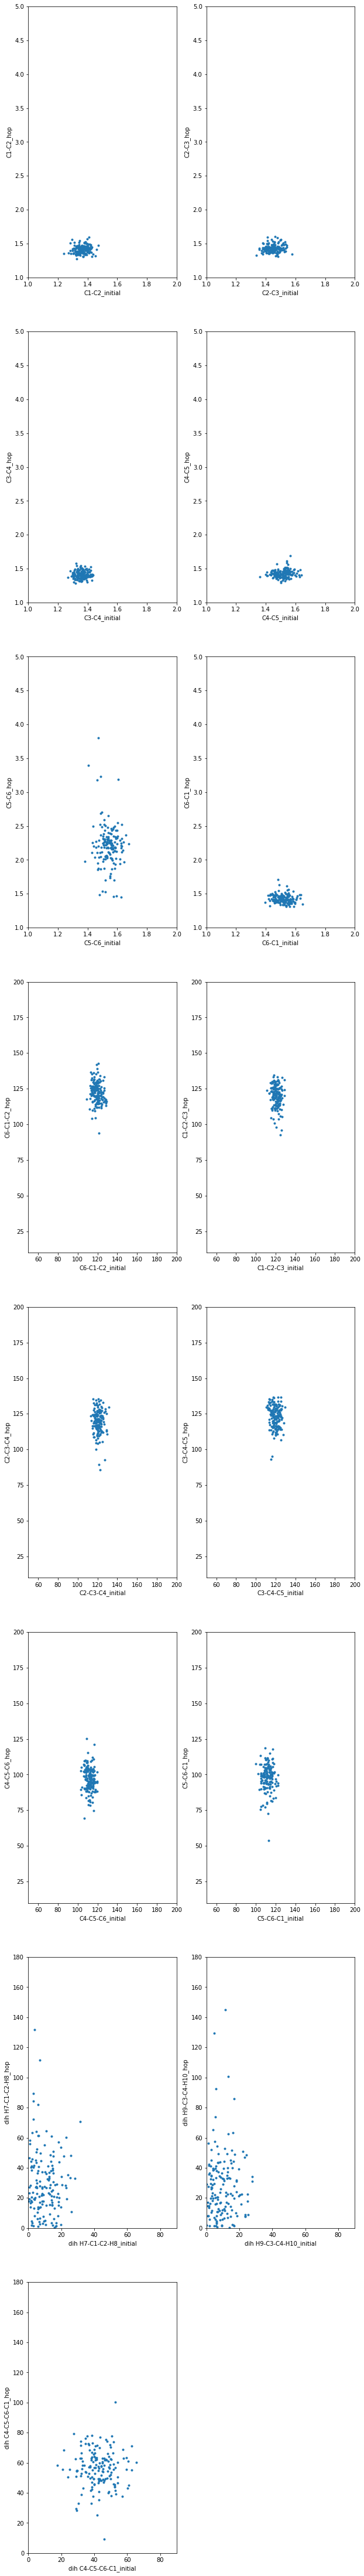

In [42]:
# ----------------------- Plot ----------------------- #
# plt.subplot(121) nrows, ncols, and index
figure_nrows = math.ceil(len(compare_mean)/2)
figure_ncols = 2
plt.figure(figsize=(10,10*figure_nrows))

# -------------- C-C bonds range(1,8) --------------
C_C_stop=NUM_CARBON
for col, axe_index in zip(compare_mean['index'][0:C_C_stop], range(1,C_C_stop+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(1,2)
    plt.ylim(1,5)
    axe_index+=1

# -------------- C-C-C angles range(20,28) --------------
for col, axe_index in zip(compare_mean['index'][C_C_stop:-3], range(C_C_stop+1,len(compare_mean)-2)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(50,200)
    plt.ylim(10,200)
    axe_index+=1

# -------------- dihedrals rang(29,31) --------------
for col, axe_index in zip(compare_mean['index'][-3:], range(len(compare_mean)-2,len(compare_mean)+1)):
    ax=plt.subplot(figure_nrows, figure_ncols, axe_index)
    initial_col = col + "_initial"
    hop_col = col + "_hop"

    plt.plot(dih_merge[initial_col],dih_merge[hop_col], '.')
    plt.xlabel(initial_col)
    plt.ylabel(hop_col)
    plt.xlim(0,90)
    plt.ylim(0,180)
    axe_index+=1
    
#------------------------- Output to file ----------------------#
output_path = os.path.join(".", "visuals", "CHD", "initial_vs_hop", date_computed + "_initial_vs_hop" + ".png")
os.makedirs(os.path.dirname(output_path), exist_ok=True) # create folder if not existed yet
plt.savefig(output_path)

In [46]:
dih_angle_df = dih_merge.iloc[:,-3:]
lower_bound = 0
upper_bound = 90
dih_angle_df_filtered_1 = dih_angle_df[(dih_angle_df['dih H7-C1-C2-H8_hop']>=lower_bound ) & (dih_angle_df['dih H7-C1-C2-H8_hop']<=upper_bound)]
H7_C1_C2_H8_hop = len(dih_angle_df_filtered_1)/len(dih_angle_df) * 100

dih_angle_df_filtered_2 = dih_angle_df[(dih_angle_df['dih H9-C3-C4-H10_hop']>=lower_bound ) & (dih_angle_df['dih H9-C3-C4-H10_hop']<=upper_bound)]
H9_C3_C4_H10_hop = len(dih_angle_df_filtered_2)/len(dih_angle_df) * 100

dih_angle_df_filtered_2 = dih_angle_df[(dih_angle_df['dih C4-C5-C6-C1_hop']>=lower_bound ) & (dih_angle_df['dih C4-C5-C6-C1_hop']<=upper_bound)]
C4_C5_C6_C1_hop = len(dih_angle_df_filtered_2)/len(dih_angle_df) * 100

data =  {'dih H7-C1-C2-H8_hop': H7_C1_C2_H8_hop, 'dih H9-C3-C4-H10_hop': H9_C3_C4_H10_hop, 'dih C4-C5-C6-C1_hop': C4_C5_C6_C1_hop}
pd.DataFrame.from_dict(data, orient='index',)

,0
dih H7-C1-C2-H8_hop,98.726115
dih H9-C3-C4-H10_hop,97.452229
dih C4-C5-C6-C1_hop,99.363057


In [38]:
# Capture output as image
# https://github.com/fomightez/dataframe2img/blob/master/index.ipynb
# https://hub.gke.mybinder.org/user/fomightez-dataframe2img-bqozwg0p/notebooks/index.ipynb    